#!sudo apt install build-essential

In [17]:
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

In [18]:
#!tar xvf ta-lib-0.4.0-src.tar.gz

In [19]:
#!wget https://files.pythonhosted.org/packages/90/05/d4c6a778d7a7de0be366bc4a850b4ffaeac2abad927f95fa8ba6f355a082/TA-Lib-0.4.17.tar.gz

In [20]:
#!tar xvf TA-Lib-0.4.17.tar.gz

# Pyspark

In [5]:

!pip install pyspark --quiet
!pip install -U -q PyDrive --quiet 
!apt install openjdk-8-jdk-headless &> /dev/null

In [6]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
import pickle

In [7]:
conf = SparkConf().set('spark.ui.port', '4050')
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-obpenjdk-amd64"


In [10]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [9]:
spark

In [11]:
# Departure delays file:
# https://drive.google.com/file/d/1uX-EyRbegg9mDXzuX5My6o8-XLIyz2oh/view?usp=sharing
departure_delay_path = "departuredelays.csv"

In [12]:
rdd = sc.textFile(departure_delay_path)

In [13]:
rdd.take(5)

['date,delay,distance,origin,destination',
 '01011245,6,602,ABE,ATL',
 '01020600,-8,369,ABE,DTW',
 '01021245,-2,602,ABE,ATL',
 '01020605,-4,602,ABE,ATL']

In [14]:
rdd = rdd.map(lambda line: line.split(','))

In [15]:
def splitLines(line):
    return line.split(",")

In [16]:
rdd = sc.textFile(departure_delay_path, minPartitions=4).map(splitLines)

In [18]:
rdd.getNumPartitions()

4

In [30]:
rdd.take(10)

[['date', 'delay', 'distance', 'origin', 'destination'],
 ['01011245', '6', '602', 'ABE', 'ATL'],
 ['01020600', '-8', '369', 'ABE', 'DTW'],
 ['01021245', '-2', '602', 'ABE', 'ATL'],
 ['01020605', '-4', '602', 'ABE', 'ATL'],
 ['01031245', '-4', '602', 'ABE', 'ATL'],
 ['01030605', '0', '602', 'ABE', 'ATL'],
 ['01041243', '10', '602', 'ABE', 'ATL'],
 ['01040605', '28', '602', 'ABE', 'ATL'],
 ['01051245', '88', '602', 'ABE', 'ATL']]

In [19]:
# Airport codes file:
# https://drive.google.com/file/d/1QuIrAtYNFBHaHPzjG9AvDeHxpFvN8_OB/view?usp=sharing
airport_codes_path = "airport-codes-na.txt"

In [20]:
sc.textFile(airport_codes_path).take(3)

['City\tState\tCountry\tIATA',
 'Abbotsford\tBC\tCanada\tYXX',
 'Aberdeen\tSD\tUSA\tABR']

In [21]:
airports_rdd = sc.textFile(airport_codes_path).map(lambda l:l.split('\t'))
airports_rdd.take(5)

[['City', 'State', 'Country', 'IATA'],
 ['Abbotsford', 'BC', 'Canada', 'YXX'],
 ['Aberdeen', 'SD', 'USA', 'ABR'],
 ['Abilene', 'TX', 'USA', 'ABI'],
 ['Akron', 'OH', 'USA', 'CAK']]

In [22]:
airports_rdd = airports_rdd.map(lambda items:(items[0], items[1]))
airports_rdd.take(5)

[('City', 'State'),
 ('Abbotsford', 'BC'),
 ('Aberdeen', 'SD'),
 ('Abilene', 'TX'),
 ('Akron', 'OH')]

In [23]:
airports_rdd.filter(lambda x:x[1]=='NY').count()

18

need to open new terminal
[Install ta-lib in python 3.7](https://joelzhang.medium.com/install-ta-lib-in-python-3-7-51219acacafb)
[solve permission denied]("Permission denied" error when editing /etc/ld.so.conf)

In [21]:

# url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
# !wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
# !wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
# !dpkg -i libta.deb ta.deb

# !pip install ta-lib



In [ ]:
# !pip install yfinance
# !pip install fear-greed-index
# !pip install finvizfinance
# !pip install finvizfinance.news
# !pip install finvizfinance.screener.overview

# import warnings
# warnings.simplefilter(action='ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor #KNN
import sklearn.linear_model as sklin #Linear Regression
from sklearn import tree  #Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import model_selection #Grid Search
from sklearn import svm #SVM
from sklearn import naive_bayes #Naive Bayes
from sklearn import ensemble #Ada Boost
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from IPython.display import display
from finvizfinance.quote import finvizfinance
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.0f}'.format
import talib
import yfinance as yf
from datetime import datetime


###NLP DATA

In [ ]:
# Finviz API
stock = finvizfinance('NVDA')

stock_fundament = stock.ticker_fundament()
stock_fundament_df = pd.DataFrame({'Fundamental Param': stock_fundament.keys(), 'Param Values': stock_fundament.values()}).transpose()
stock_description = stock.ticker_description()
outer_ratings_df = stock.ticker_outer_ratings()
# stock_signal_df = stock.ticker_signal()
news_df = stock.ticker_news()
insider_trader_df = stock.ticker_inside_trader()

# print(f"stock_description\n{stock_description}\n\nstock_fundament\n{stock_fundament}\n\outer_ratings_df\n{outer_ratings_df}\n\news_df\n{news_df}\ninsider trader:{insider_trader_df}\nstock_signal{stock_signal_df}")


# Getting recent financial news from finviz
from finvizfinance.news import News

fnews = News()
all_news = fnews.get_news
# all_news['news'].head()
# all_news['blogs'].head()
stock.ticker_charts()
# stock.ticker_signal()

In [ ]:
# Overview

from finvizfinance.screener.overview import Overview
from finvizfinance.screener.financial import Financial
from finvizfinance.screener.technical import Technical


foverview = Overview()
ffinancial = Financial()

filters_dict = {'Index':'S&P 500', 'Country': 'USA'}#, 'Industry':'Auto Manufacturers'}#, 'RSI (14)': 'Overbought (80)', } #'Any' 
# 'RSI (14)': 'Oversold (30)' / 'Not Oversold (>50)'
foverview.set_filter(filters_dict=filters_dict)
ffinancial.set_filter(filters_dict=filters_dict)
df = foverview.screener_view().sort_values(by='Volume', ascending=False)


# Screener Example
# ffinancial = Financial()
# filters_dict = {'RSI (14)': 'Oversold (30)'}
# ffinancial.set_filter(filters_dict=filters_dict)
# df = foverview.ScreenerView().sort_values(by='Volume', ascending=False)

In [4]:
df.Ticker.unique()

array(['AAPL', 'BAC', 'T', 'PFE', 'F', 'WU', 'WFC', 'NVDA', 'HBI', 'CSCO',
       'AMD', 'VZ', 'KO', 'INTC', 'CCL', 'MSFT', 'C', 'XOM', 'GM',
       'CMCSA', 'AAL', 'CERN', 'FB', 'LEG', 'KMI', 'LUMN', 'TSLA', 'NCLH',
       'HPQ', 'CSX', 'TWTR', 'ORCL', 'MRK', 'JPM', 'MRO', 'MO', 'WMT',
       'HBAN', 'PG', 'BMY', 'OXY', 'COP', 'CVX', 'NEM', 'MU', 'CNP', 'MS',
       'DVN', 'KEY', 'BKR', 'FCX', 'EBAY', 'PYPL', 'FOXA', 'VIAC', 'DAL',
       'HPE', 'VTRS', 'CTRA', 'RF', 'SLB', 'ATVI', 'JNJ', 'APA', 'QCOM',
       'WMB', 'LUV', 'SYF', 'UAL', 'USB', 'NEE', 'BK', 'INCY', 'FOX',
       'SBUX', 'DIS', 'MPC', 'KR', 'HAL', 'SCHW', 'KHC', 'BRK-B', 'BA',
       'ABBV', 'GPS', 'EXC', 'O', 'GILD', 'PPL', 'CRM', 'ABT', 'LVS',
       'MDLZ', 'V', 'TJX', 'HST', 'FITB', 'HD', 'AIG', 'BSX', 'CAG',
       'MRNA', 'SO', 'IBM', 'CL', 'DOW', 'TMUS', 'LOW', 'FDX', 'JNPR',
       'PM', 'PEP', 'FTNT', 'TFC', 'AXP', 'WBA', 'AMAT', 'MGM', 'PBCT',
       'EOG', 'COF', 'GE', 'CVS', 'MCHP', 'WY', 'RTX', 'NLOK', 'PE

In [28]:

# startdate =  "2020-01-01"
# enddate = datetime.today().strftime('%Y-%m-%d')
# stock_data = yf.download('LCID', start=startdate, end= enddate)
# stock_data.reset_index()

In [5]:
def read_data_for_ticker(ticker):
  stock_data = yf.download(ticker, start=startdate, end= enddate)
  # if len(stock_data)>=250:
  stock_data.reset_index()
  stock_data.insert(loc = 0, column='Ticker', value = ticker)
  return stock_data

###Calculate Indicators

In [6]:
def calculate_indicators_for_ticker(stock_data):
  #Overlap Studies Functions


  stock_data['SMA_9'] = talib.SMA(stock_data['Close'], timeperiod=9)
  stock_data['SMA_21'] = talib.SMA(stock_data['Close'], timeperiod=21)
  # stock_data['SMA_20V2'] = stock_data['Close'].rolling(20).mean()

  stock_data['SMA_9_21_diff'] = stock_data['SMA_9'] / stock_data['SMA_21']-1
  stock_data['SIGNAL_9_21'] = np.where(stock_data['SMA_9']>stock_data['SMA_21'],1,0)
  stock_data['SIGNAL_9_21'] = np.where(stock_data['SMA_9']<stock_data['SMA_21'],-1,stock_data['SIGNAL_9_21'])

  stock_data['return'] = np.log(stock_data['Close']).diff()
  stock_data['system_return'] = stock_data['SIGNAL_9_21'] * stock_data['return']
  stock_data['entry'] = stock_data['SIGNAL_9_21'].diff()
  stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)
  stock_data['SIGNAL_21_50'] = np.where(stock_data['SMA_21']>stock_data['SMA_50'],1,0)
  stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)
  stock_data['EMA_50'] = talib.EMA(stock_data['Close'], timeperiod=50)
  # stock_data['EMA_200'] = talib.EMA(stock_data['Close'], timeperiod=200)

  # stock_data['MA_30'] = talib.MA(stock_data['Close'], timeperiod=30, matype=0) # MA - Moving average
  # stock_data['MIDPOINT_14'] = talib.MIDPOINT(stock_data['Close'], timeperiod=14) # MIDPOINT - MidPoint over period
  # stock_data['MIDPRICE_14'] = talib.MIDPRICE(stock_data['High'], stock_data['Low'], timeperiod=14) # MIDPRICE - Midpoint Price over period
  # stock_data['TRIMA_30']= talib.TRIMA(stock_data['Close'], timeperiod=30) # TRIMA - Triangular Moving Average
  # stock_data['WMA_30'] = talib.WMA(stock_data['Close'], timeperiod=30) # WMA - Weighted Moving Average
  upper, mid, lower = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
  stock_data['lower_BBANDS_20'] = lower
  stock_data['Mid_BBANDS_20'] = mid
  stock_data['Upper_BBANDS_20'] = upper
  stock_data['BBANDS_Buy Signal'] = np.where(stock_data.Upper_BBANDS_20 > stock_data.Close, True, False)
  stock_data['BBANDS_Sell Signal'] = np.where(stock_data.Upper_BBANDS_20 < stock_data.Close, True, False)

  # stock_data['SAR'] = talib.SAR(stock_data['High'], stock_data['Low'], acceleration=0, maximum=0) # SAR - Parabolic SAR
  # stock_data['TEMA'] = talib.TEMA(stock_data['Close'], timeperiod=30) # TEMA - Triple Exponential Moving Average


  # Momentum Indicator Functions
  stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) #ADX - Average Directional Movement Index
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
  stock_data['MOM'] = talib.MOM(stock_data['Close'], timeperiod=10) #MOM - Momentum
  stock_data['ROC'] = talib.ROC(stock_data['Close'], timeperiod=10) #ROC - Rate of change : ((price/prevPrice)-1)*100
  stock_data['CCI'] = talib.CCI(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # CCI - Commodity Channel Index
  # macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
  # stock_data['MACD'] = macd
  # stock_data['MACDSignal'] = macdsignal
  # stock_data['MACDHist'] = macdhist
  # stock_data['MFI'] = talib.MFI(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume'], timeperiod=14) #MFI - Money Flow Index
  # stock_data['CMO'] = talib.CMO(stock_data['Close'], timeperiod=14) # Chande Momentum Oscillator
  # stock_data['DX'] = talib.DX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # Directional Movement Index
  # stock_data['BOP'] = talib.BOP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # BOP - Balance Of Power
  # stock_data['WILLR'] = talib.WILLR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # WILLR - Williams' %R
  # fastk, fastd = talib.STOCHRSI(stock_data['Close'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0) # STOCHRSI - Stochastic Relative Strength Index
  # stock_data['STOCHRSI_fastk'] = fastk
  # stock_data['STOCHRSI_fastd'] = fastd
  # slowk, slowd = talib.STOCH(stock_data['High'], stock_data['Low'], stock_data['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0) # STOCH - Stochastic
  # stock_data['STOCH_slowk'] = slowk
  # stock_data['STOCH_slowd'] = slowd
  # stock_data['PPO'] = talib.PPO(stock_data['Close'], fastperiod=12, slowperiod=26, matype=0) # PPO - Percentage Price Oscillator
  stock_data['ROC']= talib.ROC(stock_data['Close'], timeperiod=10) # ROC - Rate of change : ((price/prevPrice)-1)*100
  # stock_data['ROCP']= talib.ROCP(stock_data['Close'], timeperiod=10) # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  # stock_data['ROCR']= talib.ROCR(stock_data['Close'], timeperiod=10) # ROCR - Rate of change ratio: (price/prevPrice)


  # Volume Indicator Functions
  # stock_data['AD'] = talib.AD(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume']) # AD - Chaikin A/D Line
  # stock_data['ADOSC'] = talib.ADOSC(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume'], fastperiod=3, slowperiod=10) # ADOSC - Chaikin A/D Oscillator
  # stock_data['OBV'] = talib.OBV(stock_data['Close'], stock_data['Volume']) # OBV - On Balance Volume


  # Volatility Indicator Functions
  # stock_data['ATR'] = talib.ATR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # ATR - Average True Range
  # stock_data['NATR'] = talib.NATR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # NATR - Normalized Average True Range
  # stock_data['TRANGE'] = talib.TRANGE(stock_data['High'], stock_data['Low'], stock_data['Close']) # TRANGE - True Range


  # Cycle Indicator Functions
  # stock_data['HT_DCPERIOD'] = talib.HT_DCPERIOD(stock_data['Close']) # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
  # stock_data['HT_DCPHASE'] = talib.HT_DCPHASE(stock_data['Close']) # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
  # inphase, quadrature = talib.HT_PHASOR(stock_data['Close']) # HT_PHASOR - Hilbert Transform - Phasor Components
  # stock_data['INPHASE'] = inphase
  # stock_data['Quadrature'] = quadrature
  # sine, leadsine = talib.HT_SINE(stock_data['Close']) # HT_SINE - Hilbert Transform - SineWave
  # stock_data['SINE'] = sine
  # stock_data['LeadSine'] = leadsine
  # stock_data['HT_TRENDMODE']= talib.HT_TRENDMODE(stock_data['Close']) # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode


  # Pattern Recognition Functions
  # stock_data['CDL2CROWS'] = talib.CDL2CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL2CROWS - Two Crows
  # stock_data['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3BLACKCROWS - Three Black Crows
  # stock_data['CDL3INSIDE'] = talib.CDL3INSIDE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3INSIDE - Three Inside Up/Down
  # stock_data['CDL3LINESTRIKE'] = talib.CDL3LINESTRIKE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3LINESTRIKE - Three-Line Strike
  # stock_data['CDL3OUTSIDE'] = talib.CDL3OUTSIDE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3OUTSIDE - Three Outside Up/Down
  # stock_data['CDL3STARSINSOUTH'] = talib.CDL3STARSINSOUTH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3STARSINSOUTH - Three Stars In The South
  # stock_data['CDL3WHITESOLDIERS'] = talib.CDL3WHITESOLDIERS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3WHITESOLDIERS - Three Advancing White Soldiers
  # stock_data['CDLABANDONEDBABY'] = talib.CDLABANDONEDBABY(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLABANDONEDBABY - Abandoned Baby
  # stock_data['CDLADVANCEBLOCK'] = talib.CDLADVANCEBLOCK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLADVANCEBLOCK - Advance Block
  # stock_data['CDLBELTHOLD'] = talib.CDLBELTHOLD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLBELTHOLD - Belt-hold
  # stock_data['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLBREAKAWAY - Breakaway
  # stock_data['CDLCLOSINGMARUBOZU'] = talib.CDLCLOSINGMARUBOZU(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCLOSINGMARUBOZU - Closing Marubozu
  # stock_data['CDLCONCEALBABYSWALL'] = talib.CDLCONCEALBABYSWALL(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCONCEALBABYSWALL - Concealing Baby Swallow
  # stock_data['CDLCOUNTERATTACK'] = talib.CDLCOUNTERATTACK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCOUNTERATTACK - Counterattack
  # stock_data['CDLDARKCLOUDCOVER'] = talib.CDLDARKCLOUDCOVER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLDARKCLOUDCOVER - Dark Cloud Cover
  # stock_data['CDLDOJI'] = talib.CDLDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDOJI - Doji
  # stock_data['CDLDOJISTAR'] = talib.CDLDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDOJISTAR - Doji Star
  # stock_data['CDLDRAGONFLYDOJI'] = talib.CDLDRAGONFLYDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDRAGONFLYDOJI - Dragonfly Doji
  # stock_data['CDLENGULFING'] = talib.CDLENGULFING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLENGULFING - Engulfing Pattern
  # stock_data['CDLEVENINGDOJISTAR'] = talib.CDLEVENINGDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLEVENINGDOJISTAR - Evening Doji Star
  # stock_data['CDLEVENINGSTAR'] = talib.CDLEVENINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLEVENINGSTAR - Evening Star
  # stock_data['CDLGAPSIDESIDEWHITE'] = talib.CDLGAPSIDESIDEWHITE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
  # stock_data['CDLGRAVESTONEDOJI'] = talib.CDLGRAVESTONEDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLGRAVESTONEDOJI - Gravestone Doji
  # stock_data['CDLHAMMER'] = talib.CDLHAMMER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHAMMER - Hammer
  # stock_data['CDLHANGINGMAN'] = talib.CDLHANGINGMAN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHANGINGMAN - Hanging Man
  # stock_data['CDLHARAMI'] = talib.CDLHARAMI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHARAMI - Harami Pattern
  # stock_data['CDLHARAMICROSS'] = talib.CDLHARAMICROSS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHARAMICROSS - Harami Cross Pattern
  # stock_data['CDLHIGHWAVE'] = talib.CDLHIGHWAVE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIGHWAVE - High-Wave Candle
  # stock_data['CDLHIKKAKE'] = talib.CDLHIKKAKE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIKKAKE - Hikkake Pattern
  # stock_data['CDLHIKKAKEMOD'] = talib.CDLHIKKAKEMOD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIKKAKEMOD - Modified Hikkake Pattern
  # stock_data['CDLHOMINGPIGEON'] = talib.CDLHOMINGPIGEON(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHOMINGPIGEON - Homing Pigeon
  # stock_data['CDLIDENTICAL3CROWS'] = talib.CDLIDENTICAL3CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLIDENTICAL3CROWS - Identical Three Crows
  # stock_data['CDLINNECK'] = talib.CDLINNECK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLINNECK - In-Neck Pattern
  # stock_data['CDLINVERTEDHAMMER'] = talib.CDLINVERTEDHAMMER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLINVERTEDHAMMER - Inverted Hammer
  # stock_data['CDLKICKING'] = talib.CDLKICKING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'])# CDLKICKING - Kicking
  # stock_data['CDLKICKINGBYLENGTH'] = talib.CDLKICKINGBYLENGTH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
  # stock_data['CDLLADDERBOTTOM'] = talib.CDLLADDERBOTTOM(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLADDERBOTTOM - Ladder Bottom
  # stock_data['CDLLONGLEGGEDDOJI'] = talib.CDLLONGLEGGEDDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLONGLEGGEDDOJI - Long Legged Doji
  # stock_data['CDLLONGLINE'] = talib.CDLLONGLINE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLONGLINE - Long Line Candle
  # stock_data['CDLMARUBOZU'] = talib.CDLMARUBOZU(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLMARUBOZU - Marubozu
  # stock_data['CDLMATCHINGLOW'] = talib.CDLMATCHINGLOW(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLMATCHINGLOW - Matching Low
  # stock_data['CDLMATHOLD'] = talib.CDLMATHOLD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMATHOLD - Mat Hold
  # stock_data['CDLMORNINGDOJISTAR'] = talib.CDLMORNINGDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMORNINGDOJISTAR - Morning Doji Star
  # stock_data['CDLMORNINGSTAR'] = talib.CDLMORNINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMORNINGSTAR - Morning Star
  # stock_data['CDLONNECK'] = talib.CDLONNECK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLONNECK - On-Neck Pattern
  # stock_data['CDLPIERCING'] = talib.CDLPIERCING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLPIERCING - Piercing Pattern
  # stock_data['CDLRICKSHAWMAN'] = talib.CDLRICKSHAWMAN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLRICKSHAWMAN - Rickshaw Man
  # stock_data['CDLRISEFALL3METHODS'] = talib.CDLRISEFALL3METHODS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLRISEFALL3METHODS - Rising/Falling Three Methods
  # stock_data['CDLSEPARATINGLINES'] = talib.CDLSEPARATINGLINES(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSEPARATINGLINES - Separating Lines
  # stock_data['CDLSHOOTINGSTAR'] = talib.CDLSHOOTINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSHOOTINGSTAR - Shooting Star
  # stock_data['CDLSHORTLINE'] = talib.CDLSHORTLINE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSHORTLINE - Short Line Candle
  # stock_data['CDLSPINNINGTOP'] = talib.CDLSPINNINGTOP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSPINNINGTOP - Spinning Top
  # stock_data['CDLSTALLEDPATTERN'] = talib.CDLSTALLEDPATTERN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSTALLEDPATTERN - Stalled Pattern
  # stock_data['CDLSTICKSANDWICH'] = talib.CDLSTICKSANDWICH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSTICKSANDWICH - Stick Sandwich
  # stock_data['CDLTAKURI'] = talib.CDLTAKURI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
  # stock_data['CDLTASUKIGAP'] = talib.CDLTASUKIGAP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTASUKIGAP - Tasuki Gap
  # stock_data['CDLTHRUSTING'] = talib.CDLTHRUSTING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTHRUSTING - Thrusting Pattern
  # stock_data['CDLTRISTAR'] = talib.CDLTRISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTRISTAR - Tristar Pattern
  # stock_data['CDLUNIQUE3RIVER'] = talib.CDLUNIQUE3RIVER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLUNIQUE3RIVER - Unique 3 River
  # stock_data['CDLUPSIDEGAP2CROWS'] = talib.CDLUPSIDEGAP2CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
  # stock_data['CDLXSIDEGAP3METHODS'] = talib.CDLXSIDEGAP3METHODS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods


  #Statistic Functions
  # stock_data['BETA_5'] = talib.BETA(stock_data['High'], stock_data['Low'], timeperiod=5) # BETA - Beta
  # stock_data['CORREL_30'] = talib.CORREL(stock_data['High'], stock_data['Low'], timeperiod=30) # CORREL - Pearson's Correlation Coefficient (r)
  # stock_data['LINEARREG_14'] = talib.LINEARREG(stock_data['Close'], timeperiod=14) # LINEARREG - Linear Regression
  # stock_data['LINEARREG_ANGLE_14'] = talib.LINEARREG_ANGLE(stock_data['Close'], timeperiod=14) # LINEARREG_ANGLE - Linear Regression Angle
  # stock_data['LINEARREG_INTERCEPT_14'] = talib.LINEARREG_INTERCEPT(stock_data['Close'], timeperiod=14) # LINEARREG_INTERCEPT - Linear Regression Intercept
  # stock_data['LINEARREG_SLOPE_14'] = talib.LINEARREG_SLOPE(stock_data['Close'], timeperiod=14) # LINEARREG_SLOPE - Linear Regression Slope
  # stock_data['STDDEV_5'] = talib.STDDEV(stock_data['Close'], timeperiod=5, nbdev=1) # STDDEV - Standard Deviation
  # stock_data['TSF_14'] = talib.TSF(stock_data['Close'], timeperiod=14) # TSF - Time Series Forecast
  # stock_data['VAR_5'] = talib.VAR(stock_data['Close'], timeperiod=5, nbdev=1) # VAR - Variance


  return stock_data


### Class definition

In [7]:
def class_definition(stock_data, returns_pec=0.15, returns_time=7):

  # col_val = ""
  stock_data.insert(loc = 6,column = 'Target_class',value = "")

  for i in range(1, len(stock_data)):
    stock_data['Target_class'][i-returns_time] = stock_data['Close'][i]

  # convert string to float
  stock_data['Target_class'] = pd.to_numeric(stock_data['Target_class'],errors='coerce')
  
  stock_data.insert(loc = 7,column = 'Target_class_pec',value = ((stock_data['Target_class']/ stock_data['Close']) - 1))
  stock_data.insert(loc = 8,column = 'Target_class_label',value = np.where(stock_data['Target_class_pec'] > returns_pec,1,0))

  return stock_data

###Handling NA and Duplicates

In [8]:
def handling_na_duplicates(stock_data,verbose=0):
  if verbose==1:    
    print(f"Ticker: {stock_data.ticker}\ncnt rows before na and dup:{len(stock_data)}")
    stock_data.isna().sum()
    stock_data.dropna(inplace = True)
    stock_data.drop_duplicates()
    print(f"cnt rows after na and dup:{len(stock_data)}")
  else:
    stock_data.dropna(inplace = True)
    stock_data.drop_duplicates()
  return stock_data

In [ ]:
#ticker_list = ['NVDA','AAPL']
#ticker_list = list(df['Ticker'].unique())
#import os
#import time
start = time.time()
stock_data = read_data_for_ticker_list(ticker_list)
print('It took', time.time()-start, 'seconds.')
stock_data_with_indicators = calculate_indicators_for_ticker(stock_data)
print('It took', time.time()-start, 'seconds.')
stock_data_with_target_class = class_definition(stock_data_with_indicators, 0.2, 21)
print('It took', time.time()-start, 'seconds.')
stock_data_cleaned = handling_na_duplicates(stock_data_with_target_class)
print('It took', time.time()-start, 'seconds.')
stock_data.head()

##Tickers Engine

In [11]:
import warnings
import os
import time
warnings.simplefilter(action='ignore')

frames=[]
start = time.time()
# ticker_list = list(df['Ticker'].unique())
ticker_list = list(df.Ticker.unique())[:50]
#ticker_list = ['NVDA','AAPL','MSFT']
startdate =  "2019-01-01"
enddate = datetime.today().strftime('%Y-%m-%d')
print('It took', time.time()-start, 'seconds.')
for ticker in ticker_list:

  stock_data = read_data_for_ticker(ticker)
  print('It took', time.time()-start, 'seconds.')
  stock_data_with_indicators = calculate_indicators_for_ticker(stock_data)
  print('It took', time.time()-start, 'seconds.')
  stock_data_with_target_class = class_definition(stock_data_with_indicators, 0.2, 21)
  print('It took', time.time()-start, 'seconds.')
  stock_data_cleaned = handling_na_duplicates(stock_data_with_target_class)
  print('It took', time.time()-start, 'seconds.')
  frames = stock_data_cleaned.append(frames)

df_stock_data = pd.concat([frames])
df_stock_data.reset_index(inplace=True)
df_stock_data.head(50)

It took 0.0008575916290283203 seconds.
[*********************100%***********************]  1 of 1 completed
It took 0.1333463191986084 seconds.
It took 0.14804983139038086 seconds.
It took 0.4138760566711426 seconds.
It took 0.42532896995544434 seconds.
[*********************100%***********************]  1 of 1 completed
It took 0.5475249290466309 seconds.
It took 0.562067985534668 seconds.
It took 0.7854785919189453 seconds.
It took 0.7963109016418457 seconds.
[*********************100%***********************]  1 of 1 completed
It took 0.9388017654418945 seconds.
It took 0.9524266719818115 seconds.
It took 1.210277795791626 seconds.
It took 1.222320556640625 seconds.
[*********************100%***********************]  1 of 1 completed
It took 1.3856756687164307 seconds.
It took 1.40118408203125 seconds.
It took 1.621917486190796 seconds.
It took 1.6320316791534424 seconds.
[*********************100%***********************]  1 of 1 completed
It took 1.7887976169586182 seconds.
It took 

,Date,Ticker,Open,High,Low,Close,Adj Close,Target_class,Target_class_pec,Target_class_label,Volume,SMA_9,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,system_return,entry,SMA_50,SIGNAL_21_50,EMA_20,EMA_50,lower_BBANDS_20,Mid_BBANDS_20,Upper_BBANDS_20,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,RSI,MOM,ROC,CCI
0,2019-03-14,BKR,27,28,27,28,25,26,-0,0,"5,624,200",27,26,0,1,0,0,0,25,1,26,25,25,27,28,False,True,37,69,1,5,166
1,2019-03-15,BKR,28,28,28,28,25,26,-0,0,"9,978,700",27,27,0,1,0,0,0,25,1,26,25,26,27,28,False,True,37,70,1,3,163
2,2019-03-18,BKR,28,28,28,28,26,26,-0,0,"4,398,000",27,27,0,1,0,0,0,25,1,27,25,26,27,28,False,True,37,72,1,4,168
3,2019-03-19,BKR,28,29,28,28,25,26,-0,0,"4,848,400",27,27,0,1,-0,-0,0,25,1,27,25,26,27,28,True,False,37,67,1,3,119
4,2019-03-20,BKR,28,28,28,28,26,26,-0,0,"4,939,700",27,27,0,1,0,0,0,25,1,27,25,26,27,28,True,False,37,70,2,7,109
5,2019-03-21,BKR,28,29,28,28,26,27,-0,0,"3,163,700",28,27,0,1,0,0,0,25,1,27,25,26,27,29,True,False,37,71,2,9,110
6,2019-03-22,BKR,28,28,27,27,25,26,-0,0,"4,306,300",28,27,0,1,-0,-0,0,25,1,27,25,26,27,29,True,False,35,55,1,6,29
7,2019-03-25,BKR,27,27,27,27,25,26,-0,0,"2,448,300",28,27,0,1,0,0,0,26,1,27,26,26,27,29,True,False,33,57,1,4,2
8,2019-03-26,BKR,28,28,27,28,25,26,-0,0,"2,738,100",28,27,0,1,0,0,0,26,1,27,26,26,27,29,True,False,32,59,1,3,38
9,2019-03-27,BKR,28,28,27,27,25,26,-0,0,"2,487,800",28,27,0,1,-0,-0,0,26,1,27,26,26,27,29,True,False,31,55,0,0,-1


###Export Data

In [34]:
# root = '/content/drive/MyDrive/Final Project/'
# stock_data.to_csv(root + "Trading_Algorithem2.csv", sep=',')

##Charts

### EDA CHARTS - Visualization

     |████████████████████████████████| 13.1 MB 7.6 MB/s            
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.0.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
pandas-profiling 3.0.0 requires tangled-up-in-unicode==0.1.0, but you have tangled-up-in-unicode 0.2.0 which is incompatible.
fear-greed-index 0.1.3 requires matplotlib<4.0.0,>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.


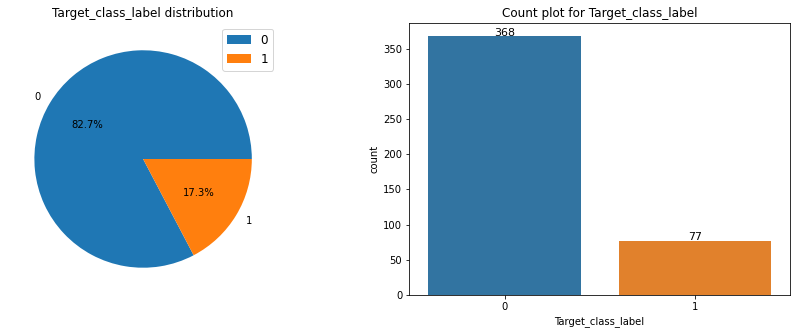

In [35]:
!pip install matplotlib==3.1.3

def get_target_split(series,figX=15,figY=7):
    f,ax=plt.subplots(1,2,figsize=(figX,figY))
    series.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
    ax[0].set_title(f'{series.name} distribution')
    ax[0].set_ylabel('')
    sns.countplot(series,ax=ax[1])
    ax[0].legend(fontsize=12)
    
    ax[1].set_title(f'Count plot for {series.name}')
    for rect in ax[1].patches:
        ax[1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
get_target_split(df_stock_data['Target_class_label'],15,5)


###Plot trades on time series

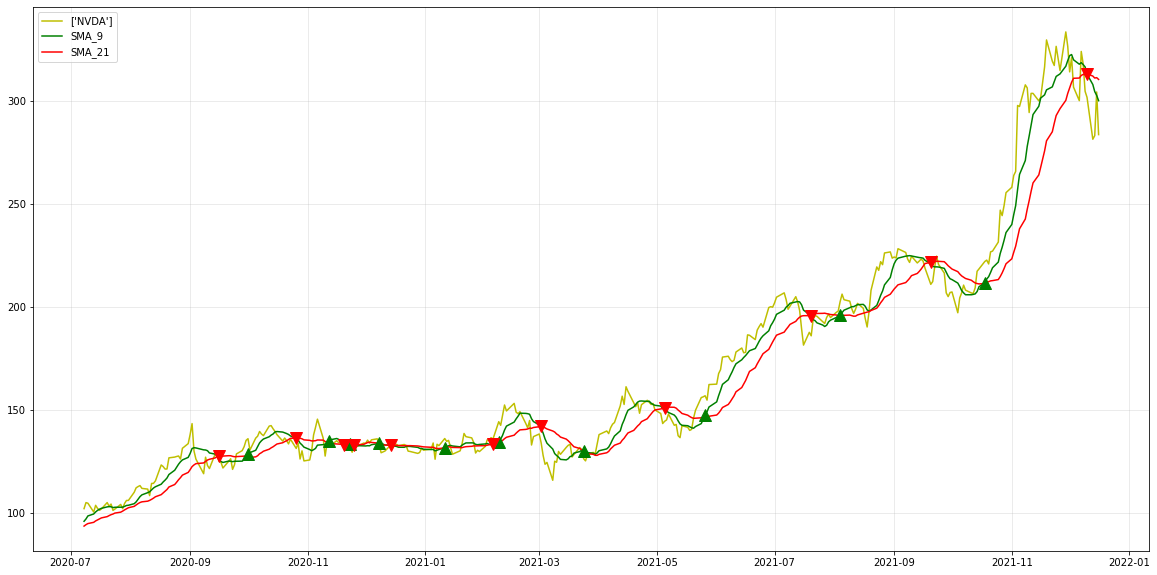

In [36]:
plt.rcParams['figure.figsize'] = 20,10
plt.grid(True, alpha =.3)
plt.plot(stock_data.iloc[-365:]['Close'], color = 'y', label = ticker_list)
plt.plot(stock_data.iloc[-365:]['SMA_9'], color = 'g', label = 'SMA_9')
plt.plot(stock_data.iloc[-365:]['SMA_21'], color = 'r', label = 'SMA_21')

plt.plot(stock_data[-365:].loc[stock_data.entry==2].index, stock_data[-365:]['SMA_9'][stock_data.entry==2], '^', color = 'g', markersize = 12)
plt.plot(stock_data[-365:].loc[stock_data.entry==-2].index, stock_data[-365:]['SMA_21'][stock_data.entry==-2], 'v', color = 'r', markersize = 12)

plt.legend(loc=2);

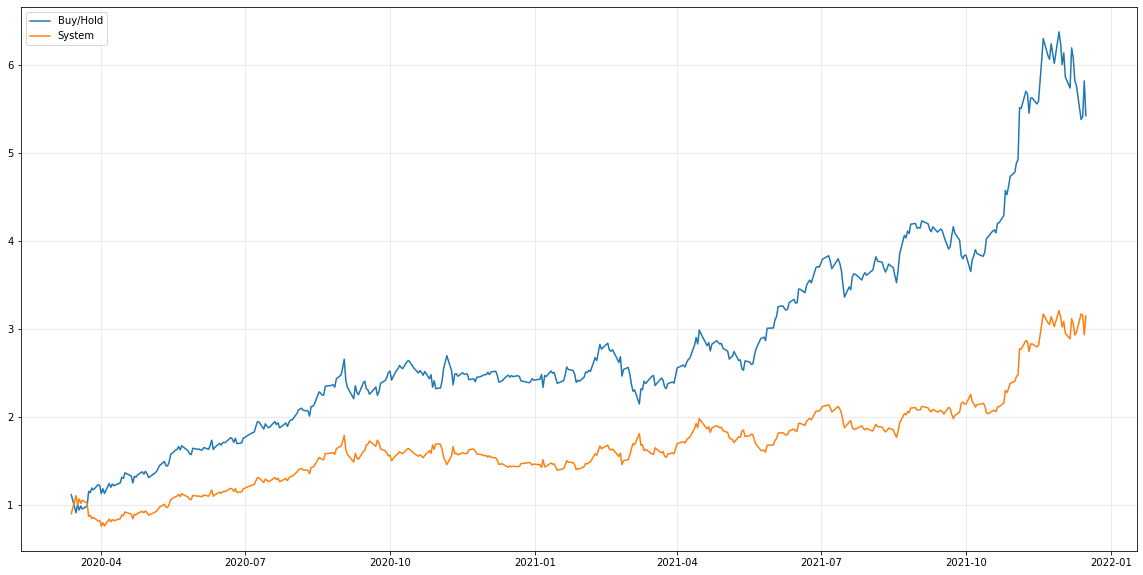

In [37]:
plt.rcParams['figure.figsize'] = 20,10


plt.plot(np.exp(stock_data['return']).cumprod(), label= 'Buy/Hold') # cumprod = acculmative return
plt.plot(np.exp(stock_data['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [38]:
np.exp(stock_data['return']).cumprod()[-1]-1

4.418309735914968

In [39]:
np.exp(stock_data['system_return']).cumprod()[-1]-1

2.1433106054572226

##Market Charts

###Fear and Greed index

In [40]:
# from fear_greed_index.CNNFearAndGreedIndex import CNNFearAndGreedIndex

# cnn_fg = CNNFearAndGreedIndex()

# # plot Fear and Greed charts
# fig = plt.figure(figsize=(20, 7))
# cnn_fg.plot_all_charts(fig)
# plt.show()




In [41]:
# print(cnn_fg.get_index())
# fear_and_greed_index = int(cnn_fg.get_index()[18:20])

# print("####################################")

# if fear_and_greed_index <32:
#   print("The Market In Fear Sentiment! Search on potential stocks.")
# elif fear_and_greed_index >75 :
#   print("The Market In Greed Sentiment! Take profit.")
# else: 
#   print("The Market In Normal Sentiment!")

# print("####################################")


#Modeling

###Set Features

In [42]:
param_to_drop = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Target_class', 'Target_class_pec', 'Target_class_label']

X = df_stock_data.drop(columns=param_to_drop)
y = df_stock_data['Target_class_label']

###Set train/ test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88, stratify = y)

###Normalize and Standartization:

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)


###Correlation Checking

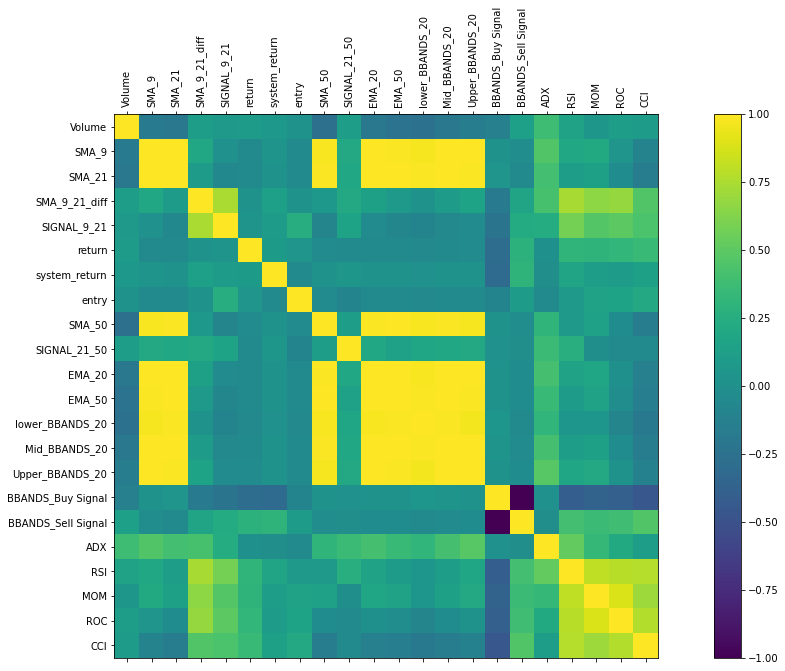

In [45]:
names = X.columns
correlations = X.corr()

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation = 90)
ax.set_yticklabels(names)
plt.show()

###Feature Selection

In [47]:
!pip install xgboost

     |████████████████████████████████| 173.5 MB 8.6 kB/s             


[11:24:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature Importances :  [0.02593266 0.1722795  0.08288899 0.10985476 0.         0.0222603
 0.01266914 0.         0.06614141 0.15680067 0.0051536  0.01150082
 0.01941949 0.0762816  0.03844707 0.         0.         0.04185369
 0.05165784 0.06207921 0.01830914 0.02646996]


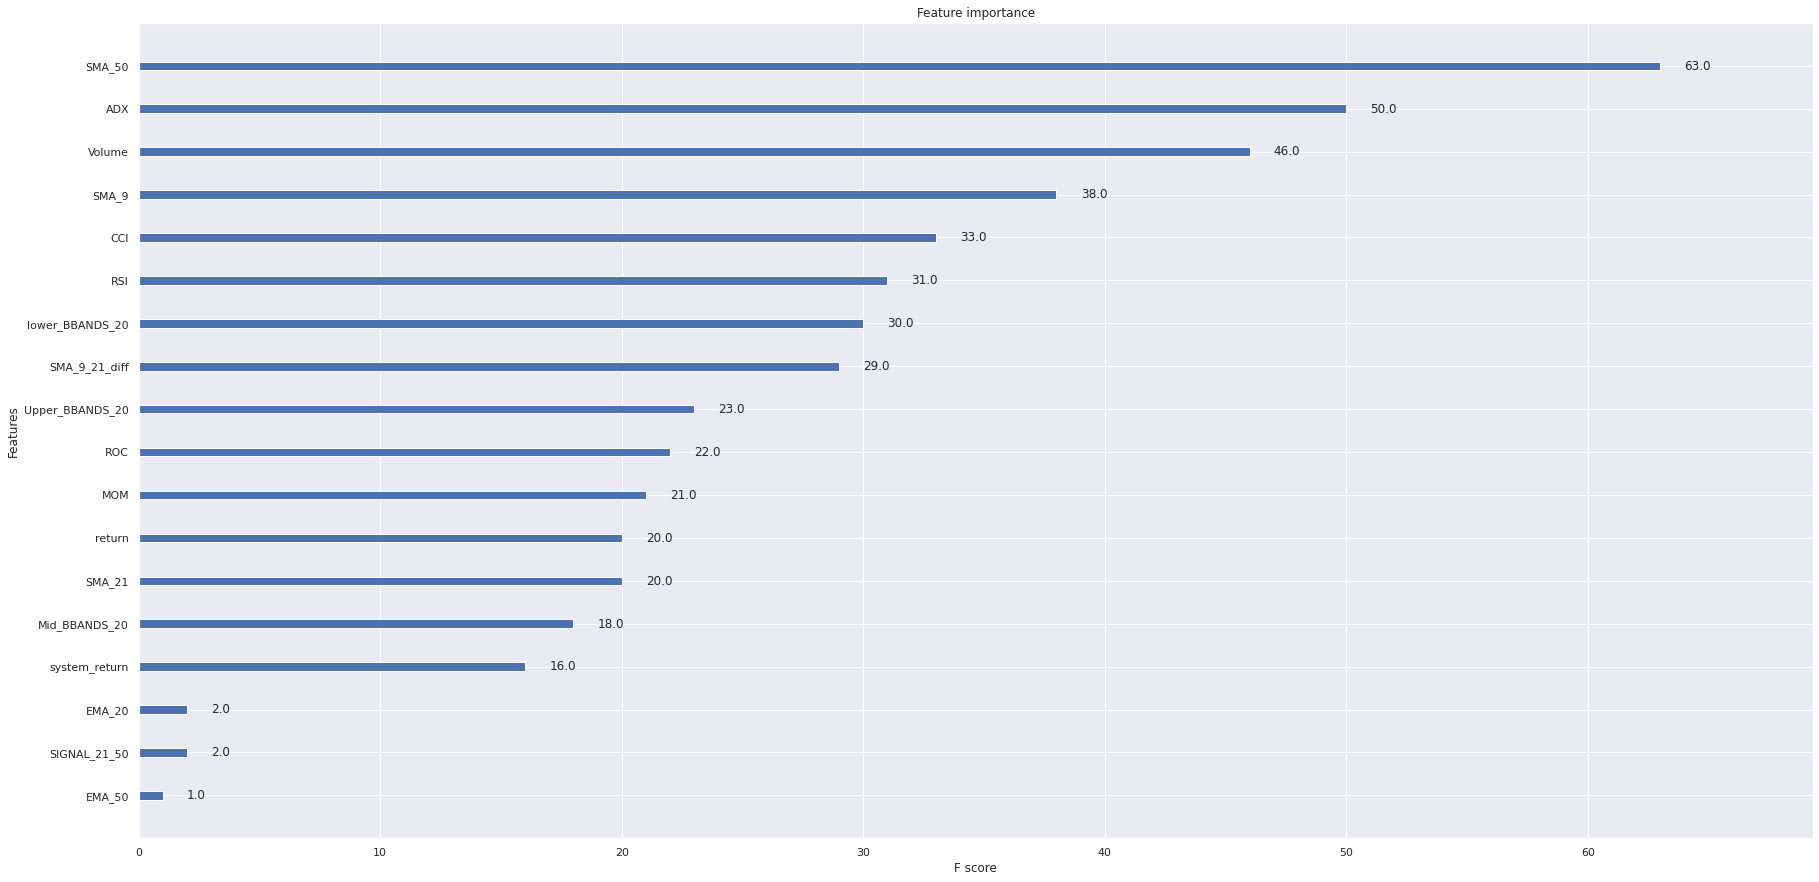

In [48]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0,max_depth=5 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)
# importances_xgb = xgb_model.feature_importances_

# plot feature importance
sns.set(rc={'figure.figsize':(30,15)})
plot_importance(xgb_model)
plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier #Random Forest

forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

                    Importance
SMA_50                      11
SMA_21                       8
EMA_50                       8
SMA_9_21_diff                8
Mid_BBANDS_20                8
SMA_9                        7
EMA_20                       6
lower_BBANDS_20              6
Upper_BBANDS_20              6
ADX                          5
RSI                          5
CCI                          4
ROC                          4
MOM                          3
Volume                       3
return                       2
system_return                2
SIGNAL_21_50                 2
SIGNAL_9_21                  0
entry                        0
BBANDS_Sell Signal           0
BBANDS_Buy Signal            0


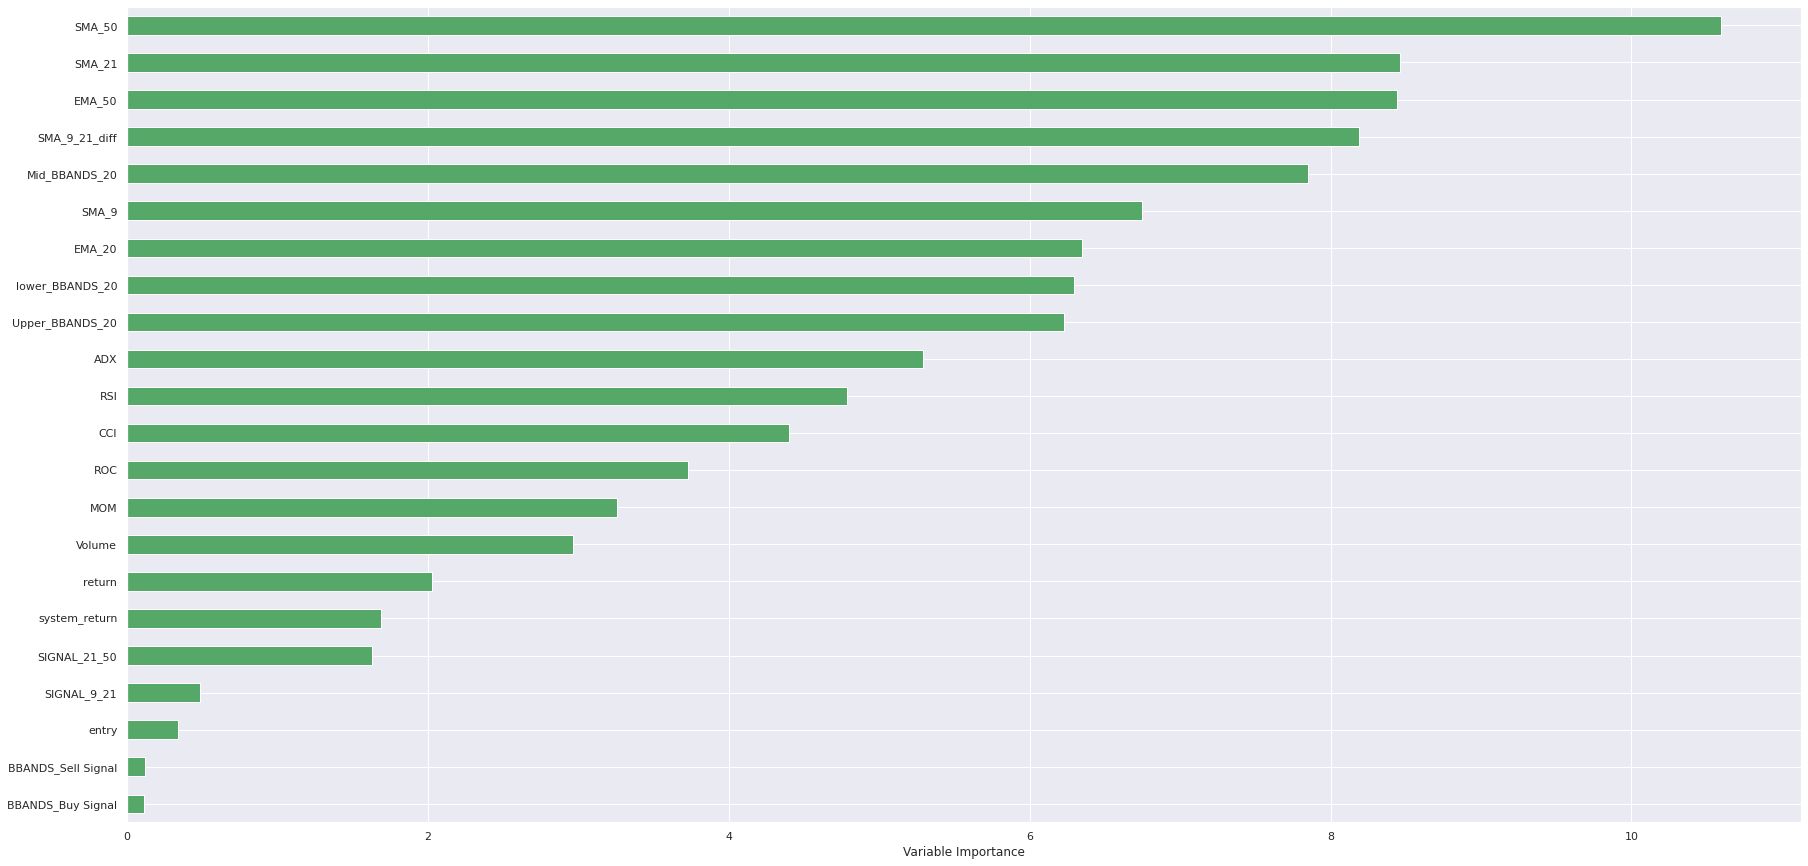

In [50]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X.columns)
Importance = Importance.nlargest(40,'Importance')
print(Importance.sort_values('Importance', axis=0, ascending=False))

Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g', )
sns.set(rc={'figure.figsize':(30,15)})
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [51]:
# saved optimal features as dataframe
col_list= pd.DataFrame(Importance).transpose().columns
col_list
x=X[col_list]
x

,SMA_50,SMA_21,EMA_50,SMA_9_21_diff,Mid_BBANDS_20,SMA_9,EMA_20,lower_BBANDS_20,Upper_BBANDS_20,ADX,RSI,CCI,ROC,MOM,Volume,return,system_return,SIGNAL_21_50,SIGNAL_9_21,entry,BBANDS_Sell Signal,BBANDS_Buy Signal
0,64,68,64,-0,68,64,65,56,79,26,45,-133,-11,-7,63483600,0,-0,1,-1,0,False,True
1,64,67,64,-0,66,62,63,53,80,28,35,-201,-29,-20,72697200,-0,0,1,-1,0,False,True
2,64,66,63,-0,65,60,62,51,80,30,41,-142,-18,-12,83363200,0,-0,1,-1,0,False,True
3,64,65,63,-0,64,58,61,50,78,32,39,-140,-29,-20,87426800,-0,0,1,-1,0,False,True
4,64,64,62,-0,63,57,61,49,77,34,42,-92,-22,-15,76551200,0,-0,0,-1,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,270,313,281,-0,314,313,307,291,336,34,50,-119,-4,-13,48850500,-0,0,1,-1,-2,False,True
441,272,312,281,-0,313,308,305,286,339,33,43,-191,-16,-52,59834400,-0,0,1,-1,0,False,True
442,274,311,281,-0,312,305,303,283,341,32,44,-178,-13,-43,66703500,0,-0,1,-1,0,False,True
443,276,312,282,-0,312,303,303,283,341,30,52,-76,-3,-10,69829700,0,-0,1,-1,0,False,True


### Select Best Model

In [52]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('SVM', SVC()))
data_Selected.append(('RF', RandomForestClassifier()))
data_Selected.append(('NB', GaussianNB()))
data_Selected

# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.859683 (0.052908)
CART: 0.893333 (0.044709)
SVM: 0.842619 (0.060477)
RF: 0.938254 (0.032433)
NB: 0.760952 (0.050984)


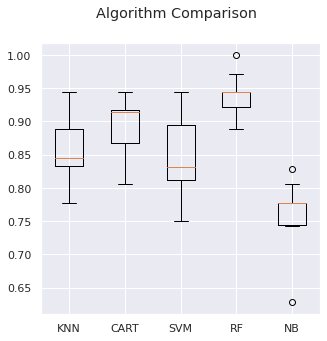

In [53]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [54]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 10,n_jobs=4,criterion='gini')
predy=rf.fit(X_train, y_train)

In [56]:
pred_rf= rf.predict(X_test)

In [57]:
print(accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

0.9438202247191011
[[73  1]
 [ 4 11]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        74
           1       0.92      0.73      0.81        15

    accuracy                           0.94        89
   macro avg       0.93      0.86      0.89        89
weighted avg       0.94      0.94      0.94        89



###Prediction


In [58]:
list_col = X.columns
# df_stock_data.head()
data=df_stock_data[df_stock_data['Ticker']=='TSLA'][list_col]
data
# predict()

,Volume,SMA_9,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,system_return,entry,SMA_50,SIGNAL_21_50,EMA_20,EMA_50,lower_BBANDS_20,Mid_BBANDS_20,Upper_BBANDS_20,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,RSI,MOM,ROC,CCI


In [24]:
head = rdd.first()
head

['date', 'delay', 'distance', 'origin', 'destination']

In [25]:
flights = rdd.filter(lambda x:x!=head)
flights.take(5)

[['01011245', '6', '602', 'ABE', 'ATL'],
 ['01020600', '-8', '369', 'ABE', 'DTW'],
 ['01021245', '-2', '602', 'ABE', 'ATL'],
 ['01020605', '-4', '602', 'ABE', 'ATL'],
 ['01031245', '-4', '602', 'ABE', 'ATL']]

In [26]:
# zipWithIndex
airports_rdd.zipWithIndex().take(5)

[(('City', 'State'), 0),
 (('Abbotsford', 'BC'), 1),
 (('Aberdeen', 'SD'), 2),
 (('Abilene', 'TX'), 3),
 (('Akron', 'OH'), 4)]

In [27]:
airports_rdd = airports_rdd.zipWithIndex().filter(lambda x:x[1] > 0).map(lambda x:x[0])

In [28]:
airports_rdd.flatMap(lambda x: x).take(5)

['Abbotsford', 'BC', 'Aberdeen', 'SD', 'Abilene']

In [31]:
# import processed data from pickle file
def pickle_open(filename):
    
    infile = open(filename,'rb')
    df = pickle.load(infile)
    infile.close
    return df

In [36]:
df_stock_data = pickle_open('stock_data_snp21_3yr')
rdd = sc.binaryFiles('stock_data_snp21_10yr')

In [ ]:
rdd.take(5)

21/12/30 23:29:53 ERROR Utils: Uncaught exception in thread stdout writer for python3
java.lang.OutOfMemoryError: Java heap space
	at java.base/java.util.Arrays.copyOf(Arrays.java:3745)
	at java.base/java.io.ByteArrayOutputStream.grow(ByteArrayOutputStream.java:120)
	at java.base/java.io.ByteArrayOutputStream.ensureCapacity(ByteArrayOutputStream.java:95)
	at java.base/java.io.ByteArrayOutputStream.write(ByteArrayOutputStream.java:156)
	at org.sparkproject.guava.io.ByteStreams.copy(ByteStreams.java:211)
	at org.sparkproject.guava.io.ByteStreams.toByteArray(ByteStreams.java:252)
	at org.apache.spark.input.PortableDataStream.toArray(PortableDataStream.scala:205)
	at org.apache.spark.api.python.PythonRDD$.write$1(PythonRDD.scala:299)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1(PythonRDD.scala:307)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1$adapted(PythonRDD.scala:307)
	at org.apache.spark.api.python.PythonRDD$$$Lambda$1538/0x